In [2]:
# import pandas as pd 
import matplotlib.pyplot as plt
import xarray as xr 
import numpy as np 
import pandas as pd 



sweep = pd.read_csv("parameter_space_ws_pmax.csv") 
# print(sweep)

PMA1X = sweep.pmax1.values
PMAX2 = sweep.pmax2.values
WS1 = sweep.ws1.values
WS2 = sweep.ws2.values


sub = sweep.loc[sweep['pmax1'] == max(PMA1X)]
sub = sub.loc[sweep['pmax2'] == min(PMAX2)]
# sub = sub.loc[sweep['ws2'] == sweep['ws2'].iloc[0]]
fn = sub['fout_name'].values 

# print(fn)
files2read_strat = ["output/strat_%d.nc" % i for i in fn]
files2read_unstrat = ["output/unstrat_%d.nc" % i for i in fn]




pmax1 = sub.pmax1.values[0]
pmax2 = sub.pmax2.values[0]
ws1 = sub.ws1.values
ws2 = sub.ws2.values

print(pmax1, pmax2)
print(ws1, ws2)
print(files2read_strat)

1.0001279295763457 1.0000012792147588
[-1.38000e-06 -3.55350e-05 -6.96900e-05 -1.03845e-04 -1.38000e-04
 -1.38000e-06 -3.55350e-05 -6.96900e-05 -1.03845e-04 -1.38000e-04
 -1.38000e-06 -3.55350e-05 -6.96900e-05 -1.03845e-04 -1.38000e-04
 -1.38000e-06 -3.55350e-05 -6.96900e-05 -1.03845e-04 -1.38000e-04
 -1.38000e-06 -3.55350e-05 -6.96900e-05 -1.03845e-04 -1.38000e-04] [1.38000e-05 1.38000e-05 1.38000e-05 1.38000e-05 1.38000e-05 3.55350e-04
 3.55350e-04 3.55350e-04 3.55350e-04 3.55350e-04 6.96900e-04 6.96900e-04
 6.96900e-04 6.96900e-04 6.96900e-04 1.03845e-03 1.03845e-03 1.03845e-03
 1.03845e-03 1.03845e-03 1.38000e-03 1.38000e-03 1.38000e-03 1.38000e-03
 1.38000e-03]
['output/strat_20.nc', 'output/strat_45.nc', 'output/strat_70.nc', 'output/strat_95.nc', 'output/strat_120.nc', 'output/strat_145.nc', 'output/strat_170.nc', 'output/strat_195.nc', 'output/strat_220.nc', 'output/strat_245.nc', 'output/strat_270.nc', 'output/strat_295.nc', 'output/strat_320.nc', 'output/strat_345.nc', 'outpu

In [3]:
# get dates
dates = pd.read_csv("/global/homes/s/siennaw/scratch/siennaw/turbulence-model/data/CIMIS/PAR_on_august_9-15.csv")
dates = dates.time 
dates = pd.to_datetime(dates)
dates = dates[::1000]
dates = dates[0:-1]

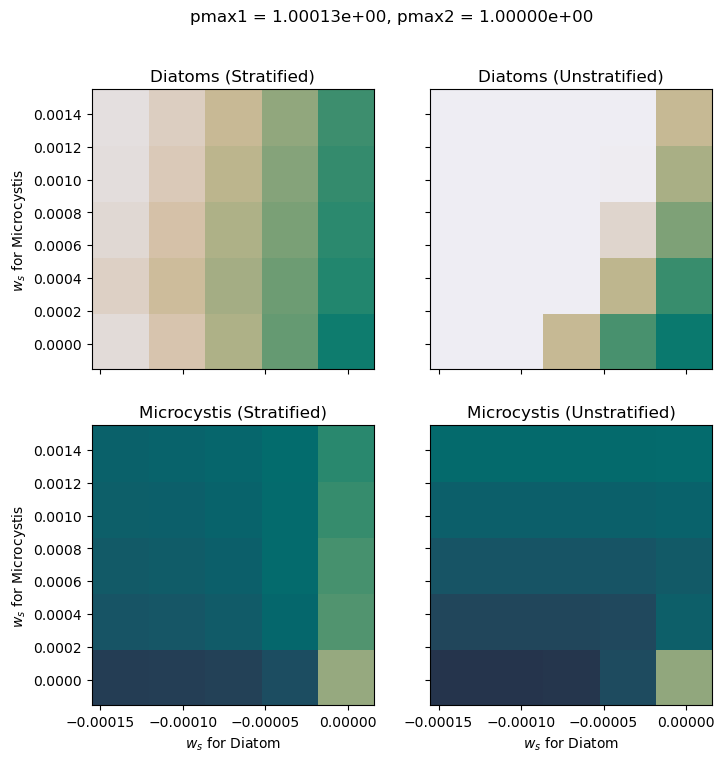

In [22]:
import cmocean as cmo
import matplotlib as mpl
dz = 0.12 # m 
dz3 = 12**3 

kwargs = { "linewidth":4, "alpha":0.7} 
def ws12color(ws):
    frac = abs(ws/max(abs(ws1)))
    return cmo.cm.thermal(frac)

def get_final_biomass(data): 
    biomass1 = data.values[-1,:] * dz3
    return np.sum(biomass1, axis=0) 

fig, axs = plt.subplots(nrows=2,ncols=2,  sharex=True, sharey=True, figsize=(8,8))
axs = axs.flatten()
u_diatom= [] 
s_diatom = []
s_hab = [] 
u_hab = []

for ind,i in enumerate(files2read_strat):
    
    data = xr.open_dataset(files2read_strat[ind], decode_times=False)
    s_diatom.append(get_final_biomass(data.algae1))
    s_hab.append(get_final_biomass(data.algae2)) 

    data = xr.open_dataset(files2read_unstrat[ind]) 
    u_diatom.append(get_final_biomass(data.algae1))
    u_hab.append(get_final_biomass(data.algae2))


x = ws1.reshape(5,5)
y = ws2.reshape(5,5)

def reshape(my_list):
    return np.array(my_list).reshape(5,5)


norm1 = mpl.colors.LogNorm(1e5, 1e9)

axs[0].pcolor(x, y, reshape(s_diatom), norm=norm1, cmap=cmo.cm.rain)
h1 = axs[1].pcolor(x, y, reshape(u_diatom), norm=norm1, cmap=cmo.cm.rain)


norm2 = mpl.colors.LogNorm(1e7, 1e9)
axs[2].pcolor(x, y, reshape(s_hab), norm=norm2, cmap=cmo.cm.rain)
h2 = axs[3].pcolor(x, y, reshape(u_hab), norm=norm2, cmap=cmo.cm.rain)

axs[0].set_title("Diatoms (Stratified)")
axs[1].set_title("Diatoms (Unstratified)")

axs[2].set_title("Microcystis (Stratified)")
axs[3].set_title("Microcystis (Unstratified)")

# plt.colorbar(h1, ax=axs[1], orientation='vertical', label="Final Biomass (Diatom)", shrink = 0.5, pad=0.2)
# plt.colorbar(h2, ax=axs[3], orientation='vertical', label="Final Biomass (Diatom)", shrink = 0.5, pad=0.2)

axs[0].set_ylabel("$w_s$ for Microcystis")
axs[2].set_ylabel("$w_s$ for Microcystis")

axs[2].set_xlabel("$w_s$ for Diatom")
axs[3].set_xlabel("$w_s$ for Diatom")

title = "pmax1 = %2.5e, pmax2 = %2.5e" % (pmax1,pmax2)
plt.suptitle(title)
fig.savefig(title + "_Grid.png")

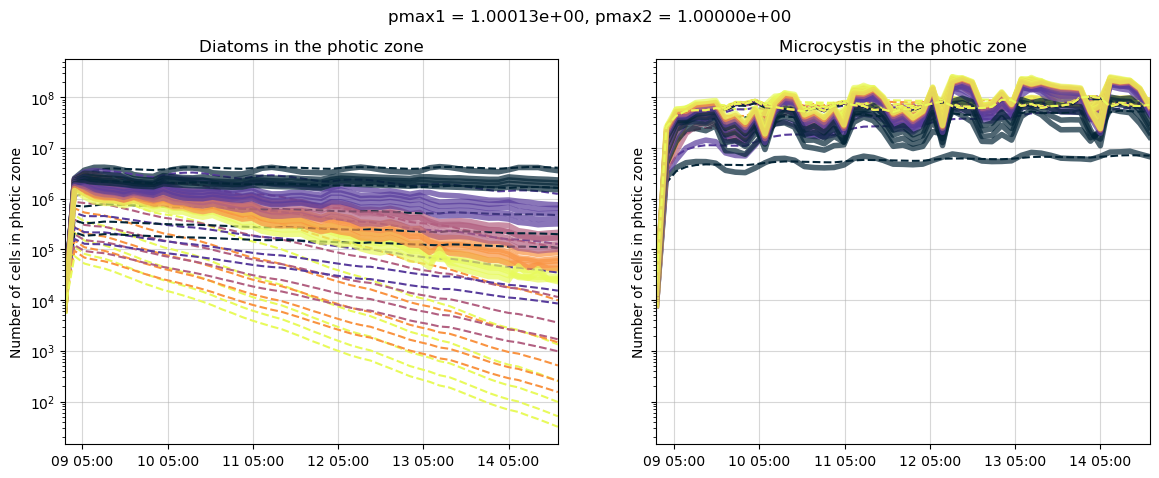

In [24]:
import cmocean as cmo

dz = 0.12 # m 
dz3 = 12**3 

kwargs = { "linewidth":4, "alpha":0.7} 
def ws12color(ws):
    frac = abs(ws/max(abs(ws1)))
    return cmo.cm.thermal(frac)


fig, axs = plt.subplots(nrows=1,ncols=2,  sharex=True, sharey=True, figsize=(14,5))

for ind,i in enumerate(files2read_strat):
    
    data = xr.open_dataset(files2read_strat[ind], decode_times=False)

    photic_biomass1 = data.algae1[:,-10:-1].values * dz3
    photic_biomass1 = np.sum(photic_biomass1, axis=1) 

    photic_biomass2 = data.algae2[:,-10:-1].values * dz3
    photic_biomass2 = np.sum(photic_biomass2, axis=1)

    if ind %1 == 0:
        axs[0].plot(dates, photic_biomass1, label="[Stratified] ws1=%2.1e, ws2=%2.1e" % (ws1[ind],ws2[ind]), color =  ws12color(ws1[ind]), **kwargs)
        axs[1].plot(dates, photic_biomass2, label="[Stratified] ws1=%2.1e, ws2=%2.1e" % (ws1[ind],ws2[ind]), color =  ws12color(ws1[ind]), **kwargs)

    else:
        axs[0].plot(dates, photic_biomass1, color =  ws12color(ws1[ind]), **kwargs)
        axs[1].plot(dates, photic_biomass2, color =  ws12color(ws1[ind]), **kwargs)

    data = xr.open_dataset(files2read_unstrat[ind])
    photic_biomass1 = data.algae1[:,-10:-1].values * dz3
    photic_biomass1 = np.sum(photic_biomass1, axis=1) 

    photic_biomass2 = data.algae2[:,-10:-1].values * dz3
    photic_biomass2 = np.sum(photic_biomass2, axis=1)
    if ind % 2 == 0:
        axs[0].plot(dates, photic_biomass1, '--',  color =  ws12color(ws1[ind]))
        axs[1].plot(dates, photic_biomass2, '--',  color =  ws12color(ws1[ind]))

    else:
        axs[0].plot(dates, photic_biomass1, '--', color =  ws12color(ws1[ind]))
        axs[1].plot(dates, photic_biomass2, '--', color =  ws12color(ws1[ind]))

    photic_biomass = data.algae2[:,-10:-1].values * dz3
    photic_biomass = np.sum(photic_biomass, axis=1)


for ax in axs:
    ax.set_yscale('log')
    ax.grid(alpha=0.5)
    ax.set_ylabel("Number of cells in photic zone")
    # ax.legend(loc="lower left")
    ax.set_xlim(dates.iloc[0],dates.iloc[-1])

axs[0].set_title("Diatoms in the photic zone")
axs[1].set_title("Microcystis in the photic zone")


import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d %H:00')
# Set locator
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=24))
axs[0].xaxis.set_major_formatter(myFmt)

title = "pmax1 = %2.5e, pmax2 = %2.5e" % (pmax1,pmax2)
plt.suptitle(title)
fig.savefig(title + ".png")
    # algae1 = sum(data.algae1[-1,:].values - data.algae1[0,:].values)
    # algae2 = sum(data.algae2[-1,:].values - data.algae2[0,:].values)
    # print("Algae1 = %f, Algae2 = %f" % (algae1,algae2))



(19947.472222222223, 19949.787037037036)

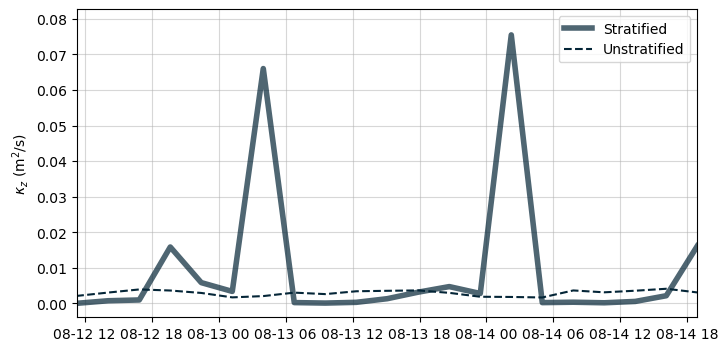

In [25]:
import cmocean as cmo

fig = plt.figure(figsize=(8,4))
ax = plt.gca() 


dz = 0.12 # m 
dz3 = 12**3 

kwargs = { "linewidth":4, "alpha":0.7} 
def ws12color(ws):
    frac = abs(ws/max(abs(ws1)))
    return cmo.cm.thermal(frac)

ind = 0 
data = xr.open_dataset(files2read_strat[ind], decode_times=False)

Kz = data.Kz.values
Kz = np.mean(Kz, axis=1) 

ax.plot(dates, Kz, color =  ws12color(ws1[ind]), **kwargs, label="Stratified")

data = xr.open_dataset(files2read_unstrat[ind], decode_times=False)

Kz2 = data.Kz.values
Kz2 = np.mean(Kz2, axis=1) 


ax.plot(dates, Kz2, '--', color =  ws12color(ws1[ind]), label="Unstratified")

# print(dates)
ax.set_xlim(dates.iloc[0], dates.iloc[-1])
# ax.set_yscale('log')
ax.grid(alpha=0.5)
ax.set_ylabel(r"$\kappa_z$ (m$^2$/s)")
ax.legend()
ax.set_xlim(dates.iloc[30],dates.iloc[-1])

# fig = plt.figure()
# plt.plot(Kz, Kz2, 'o')
    # algae1 = sum(data.algae1[-1,:].values - data.algae1[0,:].values)
    # algae2 = sum(data.algae2[-1,:].values - data.algae2[0,:].values)
    # print("Algae1 = %f, Algae2 = %f" % (algae1,algae2))



[45000. 40000. 35000. 30000. 25000. 20000. 15000. 10000.  5000.     0.]


Text(0.5, 0.98, 'Stratified PYTHON RESULT')

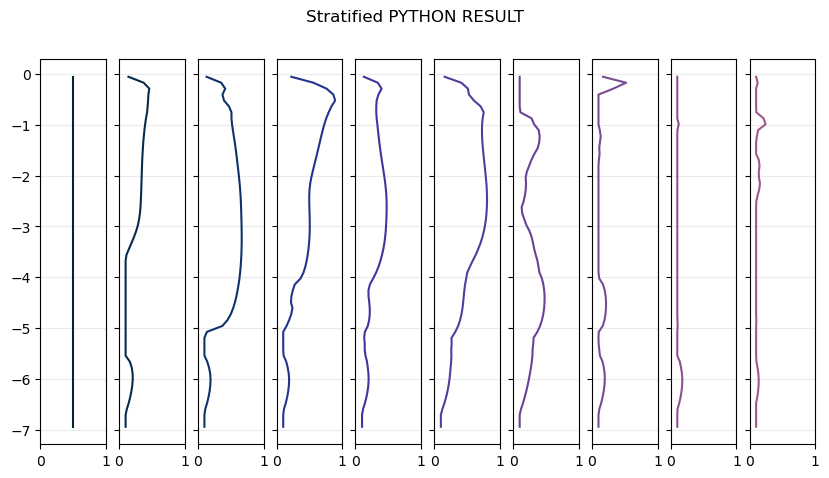

In [30]:
import xarray as xr 
import cmocean as cmo
import matplotlib.pyplot as plt

NN= 10
def i2color(i):
    frac = abs(i/20)
    return cmo.cm.thermal(frac)


ds = xr.open_dataset("/global/homes/s/siennaw/scratch/siennaw/turbulence-model/stratified_0.nc")

fig, axs = plt.subplots(nrows=1,ncols=NN,  sharex=True, sharey=True, figsize=(10,5))

var = "L"
data1 = ds[var].dropna(dim="time")
# data1 = xr.open_dataset(files2read_strat[0], decode_times=False)
# data2 = xr.open_dataset(files2read_unstrat[ind], decode_times=False)

print(data1.time.values)
vec = range(0, 10, 1)
for i, ind in enumerate(vec):
    var1 = data1.sel(time=(i*5000)) #values[:, ind]
    axs[i].plot(var1, data1.z, color = i2color(i),label="Stratified")

for ax in axs:
    ax.grid(alpha=0.25)
    ax.set_xlim(0,1)
    # ax.set_ylabel(r"$\kappa_z$ (m$^2$/s)")

plt.suptitle("Stratified PYTHON RESULT")

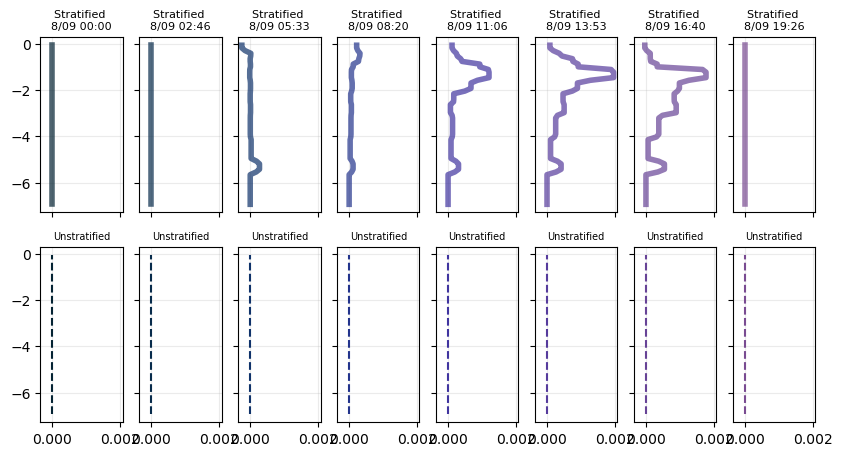

In [38]:
import cmocean as cmo
kwargs = { "linewidth":4, "alpha":0.7} 

def i2color(i):
    frac = abs(i/20)
    return cmo.cm.thermal(frac)

ind = 0 

NN = 8 
fig, axs = plt.subplots(nrows=2,ncols=NN,  sharex=True, sharey=True, figsize=(10,5))

data1 = xr.open_dataset("output/strat_0.nc", decode_times=False)
data2 = xr.open_dataset(files2read_unstrat[ind], decode_times=False)

# print(data1.C.sel(time=1).values)


VAR = "N_BV2"
vec = range(0, 50, 1)

start_time = pd.to_datetime("August 9, 2024 00:00:00")


for i, ind in enumerate(vec):
    # print("Ind = %d" % ind)
    if i >= NN:
        break

    time = start_time + pd.Timedelta(seconds=ind*1000*10)
    algae1 = data1[VAR].values[ind,:]

    axs[0,i].plot(algae1, -data1.z, color = i2color(i), **kwargs, label="Stratified")
    axs[0,i].set_title("Stratified \n" + time.strftime("8/%d %H:%M"), fontsize=8)

    algae1 = data2[VAR].values[ind,:]
    axs[1, i].plot( algae1, -data2.z, '--', color =i2color(i), label="Unstratified")
    axs[1,i].set_title("Unstratified" , fontsize=7)
# ax.grid(alpha=0.5)
# ax.set_ylabel(r"$\kappa_z$ (m$^2$/s)")

for ax in axs.ravel():
    ax.grid(alpha=0.25)
    # ax.set_xlim(0,0.5)
    # turn axis off 
    # ax.set_axis_off()
# ax.legend()

# fig.savefig("TKE.png")

<xarray.DataArray 'Kz' (z: 60, time: 48)> Size: 23kB
array([[0.000456, 0.000457, 0.000458, ..., 0.000372, 0.000938, 0.000248],
       [0.000474, 0.000474, 0.000474, ..., 0.000195, 0.00031 , 0.000248],
       [0.000443, 0.000442, 0.000442, ..., 0.000227, 0.000242, 0.000248],
       ...,
       [0.026195, 0.02678 , 0.027397, ..., 0.006684, 0.0025  , 0.001287],
       [0.017895, 0.018252, 0.01863 , ..., 0.002757, 0.001654, 0.001287],
       [0.006308, 0.006437, 0.006572, ..., 0.001238, 0.001235, 0.001287]])
Coordinates:
  * time     (time) float64 384B 470.0 460.0 450.0 440.0 ... 30.0 20.0 10.0 0.0
  * z        (z) float64 480B -6.942 -6.825 -6.708 ... -0.2917 -0.175 -0.05833
[470. 460. 450. 440. 430. 420. 410. 400. 390. 380. 370. 360. 350. 340.
 330. 320. 310. 300. 290. 280. 270. 260. 250. 240. 230. 220. 210. 200.
 190. 180. 170. 160. 150. 140. 130. 120. 110. 100.  90.  80.  70.  60.
  50.  40.  30.  20.  10.   0.]
(60, 48)


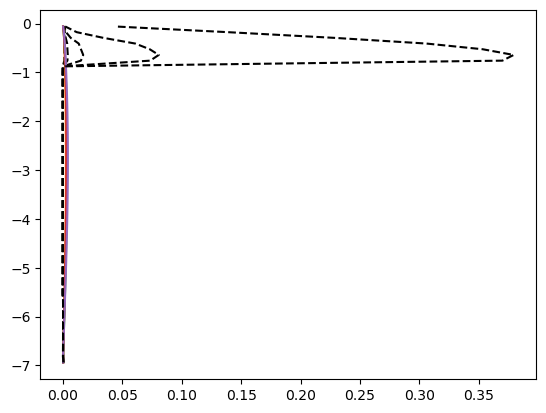

<Figure size 640x480 with 0 Axes>

In [195]:
import xarray as xr 
import matplotlib.pyplot as plt
ds = xr.open_dataset("/global/homes/s/siennaw/scratch/siennaw/1D_JL_Turbulence_Model/output/unstrat_0.nc")
# print(ds)
ds2 = xr.open_dataset("/global/homes/s/siennaw/scratch/siennaw/turbulence-model/stratified_0.nc")
# print(ds2)
# print(ds.data_vars)
# print(ds2.data_vars)
var = "Kz"
dsu = ds2[var].dropna(dim="time")
print(dsu)
print(dsu.time.values)
# print(ds.time.values)
for i in range(0,5):
    var1 = ds[var].isel(time=i).values
    var2 = dsu.sel(time=(i*10))
    plt.plot(var1, -ds.z.values, label="%d" % i)
    plt.plot(var2, ds2.z.values, '--k', label="python")

print(dsu.shape)

fig = plt.figure()



import cmocean as cmo 
import matplotlib as mpl

data2plot1 = np.zeros((len(ws1),1))
data2plot2 = np.zeros((len(ws1),1))

for ind,i in enumerate(files2read_strat):
    data = xr.open_dataset(i)
    algae1 = sum(data.algae1[-1,:].values - data.algae1[0,:].values)
    algae2 = sum(data.algae2[-1,:].values - data.algae2[0,:].values)
    # print("Algae1 = %f, Algae2 = %f" % (algae1,algae2))
    data2plot1[ind] = algae1 
    data2plot2[ind] = algae2


NORM0 = mpl.colors.LogNorm()

fig = plt.figure() 
# plt.xscale('log')
# plt.yscale('log')
h = plt.pcolor(ws1.reshape(5,5), ws2.reshape(5,5), data2plot1.reshape(5,5), cmap=cmo.cm.thermal, norm=NORM0)
ax = plt.gca() 
plt.colorbar(h)
ax.set_xlabel("pmax1")
ax.set_ylabel("pmax2")


fig = plt.figure() 
# Set colorscale to log 
# plt.xscale('log')
# plt.yscale('log')
h = plt.pcolor(ws1.reshape(5,5), ws2.reshape(5,5), data2plot2.reshape(5,5), cmap=cmo.cm.thermal, norm=NORM0)
ax = plt.gca() 
plt.colorbar(h)
ax.set_xlabel("pmax1")
ax.set_ylabel("pmax2")


